In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from matplotlib.patches import Rectangle

relu_only = False

# ***************************
# ***                     ***
# ***    SET VARIABLES    ***
# ***                     ***
# ***************************


# STOCK SYMBOL TO PROCESS:
input_symbol_01 = "^VIX"
print(f"Symbol 01: {input_symbol_01}")
input_symbol_02 = "^VIX3M"
print(f"Symbol 02: {input_symbol_02}")
input_symbol_03 = "SPY"
# input_symbol_03 = "SVXY"
print(f"Symbol 03: {input_symbol_03}")

days_in_future_that_result_is_calculated = 250
print(f"Days in future that result is calculated: {days_in_future_that_result_is_calculated}")

reversion_low_value = 12
print(f"reversion_low_value: {reversion_low_value}")

reversion_high_value = 20
print(f"reversion_high_value: {reversion_high_value}")



Symbol 01: ^VIX
Symbol 02: ^VIX3M
Symbol 03: SPY
Days in future that result is calculated: 250
reversion_low_value: 12
reversion_high_value: 20


In [2]:
pip install yahoo_fin

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install requests_html

In [4]:
from yahoo_fin.stock_info import get_data

In [5]:
# Load from Yahoo Finance API
from datetime import date
today = date.today()
curr_date = today.strftime("%m/%d/%Y")
df_01 = get_data(input_symbol_01, start_date="01/01/2000", end_date=curr_date, index_as_date = False, interval="1d")
df_01_min_date = (df_01.iloc[0]["date"])
df_01

,date,open,high,low,close,adjclose,volume,ticker
0,2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0.0,^VIX
1,2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0.0,^VIX
2,2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0.0,^VIX
3,2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0.0,^VIX
4,2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0.0,^VIX
...,...,...,...,...,...,...,...,...
6107,2023-05-31,18.040001,18.400000,17.120001,17.940001,17.940001,0.0,^VIX
6108,2023-06-01,17.240000,17.590000,15.580000,15.650000,15.650000,0.0,^VIX
6109,2023-06-02,15.650000,15.650000,14.420000,14.600000,14.600000,0.0,^VIX
6110,2023-06-05,15.280000,15.290000,14.660000,14.730000,14.730000,0.0,^VIX


In [6]:
# Load from Yahoo Finance API
from datetime import date
today = date.today()
curr_date = today.strftime("%m/%d/%Y")
df_02 = get_data(input_symbol_02, start_date="01/01/2000", end_date=curr_date, index_as_date = False, interval="1d")
df_02_min_date = (df_02.iloc[0]["date"])
df_02

,date,open,high,low,close,adjclose,volume,ticker
0,2006-07-17,18.049999,18.049999,18.049999,18.049999,18.049999,0,^VIX3M
1,2006-07-18,17.219999,17.219999,17.219999,17.219999,17.219999,0,^VIX3M
2,2006-07-19,15.600000,15.600000,15.600000,15.600000,15.600000,0,^VIX3M
3,2006-07-20,16.309999,16.309999,16.309999,16.309999,16.309999,0,^VIX3M
4,2006-07-21,17.040001,17.040001,17.040001,17.040001,17.040001,0,^VIX3M
...,...,...,...,...,...,...,...,...
4247,2023-05-31,20.559999,20.879999,19.870001,20.209999,20.209999,0,^VIX3M
4248,2023-06-01,19.959999,20.080000,18.709999,18.750000,18.750000,0,^VIX3M
4249,2023-06-02,18.299999,18.440001,17.760000,17.920000,17.920000,0,^VIX3M
4250,2023-06-05,18.230000,18.330000,17.900000,17.900000,17.900000,0,^VIX3M


In [7]:
# Load from Yahoo Finance API
from datetime import date
today = date.today()
curr_date = today.strftime("%m/%d/%Y")
df_03 = get_data(input_symbol_03, start_date="01/01/2000", end_date=curr_date, index_as_date = False, interval="1d")
df_03_min_date = (df_03.iloc[0]["date"])
df_03

,date,open,high,low,close,adjclose,volume,ticker
0,2000-01-03,148.250000,148.250000,143.875000,145.437500,94.946442,8164300,SPY
1,2000-01-04,143.531250,144.062500,139.640625,139.750000,91.233498,8089800,SPY
2,2000-01-05,139.937500,141.531250,137.250000,140.000000,91.396660,12177900,SPY
3,2000-01-06,139.625000,141.500000,137.750000,137.750000,89.927803,6227200,SPY
4,2000-01-07,140.312500,145.750000,140.062500,145.750000,95.150444,8066500,SPY
...,...,...,...,...,...,...,...,...
5889,2023-05-31,418.279999,419.220001,416.220001,417.850006,417.850006,110811800,SPY
5890,2023-06-01,418.089996,422.920013,416.790009,421.820007,421.820007,88865000,SPY
5891,2023-06-02,424.500000,428.739990,423.950012,427.920013,427.920013,91366700,SPY
5892,2023-06-05,428.279999,429.619995,426.369995,427.100006,427.100006,65460200,SPY


In [8]:
latest_date = df_01_min_date
if df_02_min_date > latest_date:
  latest_date = df_02_min_date
if df_03_min_date > latest_date:
  latest_date = df_03_min_date
print(latest_date)

2006-07-17 00:00:00


In [9]:
df_01 = df_01[df_01.date >= latest_date]
df_01

,date,open,high,low,close,adjclose,volume,ticker
1705,2006-07-17,18.730000,18.760000,17.750000,18.639999,18.639999,0.0,^VIX
1706,2006-07-18,18.200001,19.580000,17.660000,17.740000,17.740000,0.0,^VIX
1707,2006-07-19,17.620001,17.620001,14.470000,15.550000,15.550000,0.0,^VIX
1708,2006-07-20,15.100000,16.370001,14.870000,16.209999,16.209999,0.0,^VIX
1709,2006-07-21,16.230000,17.559999,16.230000,17.400000,17.400000,0.0,^VIX
...,...,...,...,...,...,...,...,...
6107,2023-05-31,18.040001,18.400000,17.120001,17.940001,17.940001,0.0,^VIX
6108,2023-06-01,17.240000,17.590000,15.580000,15.650000,15.650000,0.0,^VIX
6109,2023-06-02,15.650000,15.650000,14.420000,14.600000,14.600000,0.0,^VIX
6110,2023-06-05,15.280000,15.290000,14.660000,14.730000,14.730000,0.0,^VIX


In [10]:
df_02 = df_02[df_02.date >= latest_date]
df_02

,date,open,high,low,close,adjclose,volume,ticker
0,2006-07-17,18.049999,18.049999,18.049999,18.049999,18.049999,0,^VIX3M
1,2006-07-18,17.219999,17.219999,17.219999,17.219999,17.219999,0,^VIX3M
2,2006-07-19,15.600000,15.600000,15.600000,15.600000,15.600000,0,^VIX3M
3,2006-07-20,16.309999,16.309999,16.309999,16.309999,16.309999,0,^VIX3M
4,2006-07-21,17.040001,17.040001,17.040001,17.040001,17.040001,0,^VIX3M
...,...,...,...,...,...,...,...,...
4247,2023-05-31,20.559999,20.879999,19.870001,20.209999,20.209999,0,^VIX3M
4248,2023-06-01,19.959999,20.080000,18.709999,18.750000,18.750000,0,^VIX3M
4249,2023-06-02,18.299999,18.440001,17.760000,17.920000,17.920000,0,^VIX3M
4250,2023-06-05,18.230000,18.330000,17.900000,17.900000,17.900000,0,^VIX3M


In [11]:
df_03 = df_03[df_03.date >= latest_date]
df_03

,date,open,high,low,close,adjclose,volume,ticker
1642,2006-07-17,123.519997,124.099998,123.150002,123.339996,88.980400,81159000,SPY
1643,2006-07-18,123.709999,124.050003,122.389999,123.970001,89.434891,122771000,SPY
1644,2006-07-19,124.180000,126.260002,123.720001,125.690002,90.675751,133565300,SPY
1645,2006-07-20,126.120003,126.300003,124.660004,124.830002,90.055328,112259800,SPY
1646,2006-07-21,125.150002,125.190002,123.820000,123.949997,89.420479,101560000,SPY
...,...,...,...,...,...,...,...,...
5889,2023-05-31,418.279999,419.220001,416.220001,417.850006,417.850006,110811800,SPY
5890,2023-06-01,418.089996,422.920013,416.790009,421.820007,421.820007,88865000,SPY
5891,2023-06-02,424.500000,428.739990,423.950012,427.920013,427.920013,91366700,SPY
5892,2023-06-05,428.279999,429.619995,426.369995,427.100006,427.100006,65460200,SPY


In [12]:
col01 = (f"{input_symbol_01}_close")
col02 = (f"{input_symbol_02}_close")
col03 = (f"{input_symbol_03}_close")
df = df_01[['date', 'close']].copy()
df = df.rename(columns={'close': col01})
df = df.merge(df_02, on='date')
df = df.rename(columns={'close': col02})
df = df.drop(columns=['open', 'high', 'low', 'adjclose', 'volume', 'ticker'])
df['percentage'] = ""
df['percentage_boolean'] = ""
df['reversion_boolean'] = ""
df = df.merge(df_03, on='date')
df = df.rename(columns={'close': col03})
df = df.drop(columns=['open', 'high', 'low', 'adjclose', 'volume', 'ticker'])
df['future_result'] = ""
df['future_result_boolean'] = ""
df

,date,^VIX_close,^VIX3M_close,percentage,percentage_boolean,reversion_boolean,SPY_close,future_result,future_result_boolean
0,2006-07-17,18.639999,18.049999,,,,123.339996,,
1,2006-07-18,17.740000,17.219999,,,,123.970001,,
2,2006-07-19,15.550000,15.600000,,,,125.690002,,
3,2006-07-20,16.209999,16.309999,,,,124.830002,,
4,2006-07-21,17.400000,17.040001,,,,123.949997,,
...,...,...,...,...,...,...,...,...,...
4247,2023-05-31,17.940001,20.209999,,,,417.850006,,
4248,2023-06-01,15.650000,18.750000,,,,421.820007,,
4249,2023-06-02,14.600000,17.920000,,,,427.920013,,
4250,2023-06-05,14.730000,17.900000,,,,427.100006,,


In [13]:
for i in range(len(df)):

    if (i < (len(df))):
      df.percentage[i] = (df[col02][i]/df[col01][i])
      if ( (df[col01][i] > reversion_low_value) & (df[col01][i] < reversion_high_value) ):
        df.reversion_boolean[i] = 1
      else:
        df.reversion_boolean[i] = 0
    if (i < (len(df)-days_in_future_that_result_is_calculated)):
      df.future_result[i] = ((df[col03][i+days_in_future_that_result_is_calculated]-df[col03][i])/df[col03][i])

df = df[df['future_result'] != ""]

df

C:\Users\mlech\AppData\Local\Temp\ipykernel_16764\2332198336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.percentage[i] = (df[col02][i]/df[col01][i])
C:\Users\mlech\AppData\Local\Temp\ipykernel_16764\2332198336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.reversion_boolean[i] = 1
C:\Users\mlech\AppData\Local\Temp\ipykernel_16764\2332198336.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.future_result[i] = ((

,date,^VIX_close,^VIX3M_close,percentage,percentage_boolean,reversion_boolean,SPY_close,future_result,future_result_boolean
0,2006-07-17,18.639999,18.049999,0.968348,,1,123.339996,0.255311,
1,2006-07-18,17.740000,17.219999,0.970688,,1,123.970001,0.248286,
2,2006-07-19,15.550000,15.600000,1.003215,,1,125.690002,0.228976,
3,2006-07-20,16.209999,16.309999,1.006169,,1,124.830002,0.242249,
4,2006-07-21,17.400000,17.040001,0.97931,,1,123.949997,0.238403,
...,...,...,...,...,...,...,...,...,...
3997,2022-06-01,25.690001,27.719999,1.079019,,0,409.589996,0.020167,
3998,2022-06-02,24.719999,27.059999,1.09466,,0,417.390015,0.010614,
3999,2022-06-03,24.790001,27.330000,1.102461,,0,410.540009,0.042334,
4000,2022-06-06,25.070000,27.219999,1.08576,,0,411.790009,0.037179,


In [14]:
df["percentage"] = pd.to_numeric(df["percentage"])
df["reversion_boolean"] = pd.to_numeric(df["reversion_boolean"])
df["future_result"] = pd.to_numeric(df["future_result"])

for i in range(len(df)):
    if (df['percentage'][i] > 1):
      df.percentage_boolean[i] = 1
    else:
      df.percentage_boolean[i] = 0
    if (df['future_result'][i] > 0):
      df.future_result_boolean[i] = 1
    else:
      df.future_result_boolean[i] = 0

df["future_result_boolean"] = pd.to_numeric(df["future_result_boolean"])
df["percentage_boolean"] = pd.to_numeric(df["percentage_boolean"])
df.dtypes

C:\Users\mlech\AppData\Local\Temp\ipykernel_16764\2048380017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["percentage"] = pd.to_numeric(df["percentage"])
C:\Users\mlech\AppData\Local\Temp\ipykernel_16764\2048380017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reversion_boolean"] = pd.to_numeric(df["reversion_boolean"])
C:\Users\mlech\AppData\Local\Temp\ipykernel_16764\2048380017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

date                     datetime64[ns]
^VIX_close                      float64
^VIX3M_close                    float64
percentage                      float64
percentage_boolean                int64
reversion_boolean                 int64
SPY_close                       float64
future_result                   float64
future_result_boolean             int64
dtype: object

In [15]:
df

,date,^VIX_close,^VIX3M_close,percentage,percentage_boolean,reversion_boolean,SPY_close,future_result,future_result_boolean
0,2006-07-17,18.639999,18.049999,0.968348,0,1,123.339996,0.255311,1
1,2006-07-18,17.740000,17.219999,0.970688,0,1,123.970001,0.248286,1
2,2006-07-19,15.550000,15.600000,1.003215,1,1,125.690002,0.228976,1
3,2006-07-20,16.209999,16.309999,1.006169,1,1,124.830002,0.242249,1
4,2006-07-21,17.400000,17.040001,0.979310,0,1,123.949997,0.238403,1
...,...,...,...,...,...,...,...,...,...
3997,2022-06-01,25.690001,27.719999,1.079019,1,0,409.589996,0.020167,1
3998,2022-06-02,24.719999,27.059999,1.094660,1,0,417.390015,0.010614,1
3999,2022-06-03,24.790001,27.330000,1.102461,1,0,410.540009,0.042334,1
4000,2022-06-06,25.070000,27.219999,1.085760,1,0,411.790009,0.037179,1


In [16]:
df_temp = df.copy()

In [17]:
df = df_temp.copy()
# df = df.loc[(df['percentage']>1.3)]
# df = df.loc[(df['percentage']>1.0)]
# df = df.loc[(df['percentage']<0.9)]
# df = df.loc[(df['^VIX3M_close']>55)]
# df = df.loc[(df['^VIX_close']>20)]
# df = df.loc[(df['^VIX_close']>60) | (df['^VIX3M_close']>60)]
df

,date,^VIX_close,^VIX3M_close,percentage,percentage_boolean,reversion_boolean,SPY_close,future_result,future_result_boolean
0,2006-07-17,18.639999,18.049999,0.968348,0,1,123.339996,0.255311,1
1,2006-07-18,17.740000,17.219999,0.970688,0,1,123.970001,0.248286,1
2,2006-07-19,15.550000,15.600000,1.003215,1,1,125.690002,0.228976,1
3,2006-07-20,16.209999,16.309999,1.006169,1,1,124.830002,0.242249,1
4,2006-07-21,17.400000,17.040001,0.979310,0,1,123.949997,0.238403,1
...,...,...,...,...,...,...,...,...,...
3997,2022-06-01,25.690001,27.719999,1.079019,1,0,409.589996,0.020167,1
3998,2022-06-02,24.719999,27.059999,1.094660,1,0,417.390015,0.010614,1
3999,2022-06-03,24.790001,27.330000,1.102461,1,0,410.540009,0.042334,1
4000,2022-06-06,25.070000,27.219999,1.085760,1,0,411.790009,0.037179,1


In [24]:
# # Draw a scatter plot
# x=df['percentage'].to_numpy()
# y=df['future_result'].to_numpy()
# z=df['future_result_boolean'].to_numpy()
# slope, intercept, r, p, std_err = stats.linregress(x, y)
# def myfunc(x):
#   return slope * x + intercept
# mymodel = list(map(myfunc, x))
# plt.gca().add_patch(Rectangle((70.1, 0), 13, .2, color='green', alpha=0.1))
# plt.axvline(70.1, color='yellow')
# plt.axhline(0, color='yellow')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.scatter(x, y, c=z, cmap='RdYlGn', alpha=0.8, s=20)
# plt.plot(x, mymodel)
# plt.show()

#  # Draw a scatter plot
# # x=df['percentage'].to_numpy()
# x=df['^VIX_close'].to_numpy()
# # x=df['^VIX3M_close'].to_numpy()
# y=df['future_result'].to_numpy()
# z=df['future_result_boolean'].to_numpy()
# slope, intercept, r, p, std_err = stats.linregress(x, y)
# def myfunc(x):
#   return slope * x + intercept
# mymodel = list(map(myfunc, x))
# # plt.axvline(1, color='yellow')
# plt.axhline(0, color='yellow')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.scatter(x, y, c=z, cmap='RdYlGn', alpha=0.5, s=20)
# # plt.scatter(x, y, color='g', s=20)
# plt.plot(x, mymodel)
# plt.show()

# # x=df['percentage'].to_numpy()
# x=df['^VIX_close'].to_numpy()
# # x=df['^VIX3M_close'].to_numpy()
# y=df['future_result'].to_numpy()
# z=df['future_result_boolean'].to_numpy()
# slope, intercept, r, p, std_err = stats.linregress(x, y)
# def myfunc(x):
#   return slope * x + intercept
# mymodel = list(map(myfunc, x))
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.scatter(x, y, color='g', s=20)
# plt.plot(x, mymodel)
# plt.show()

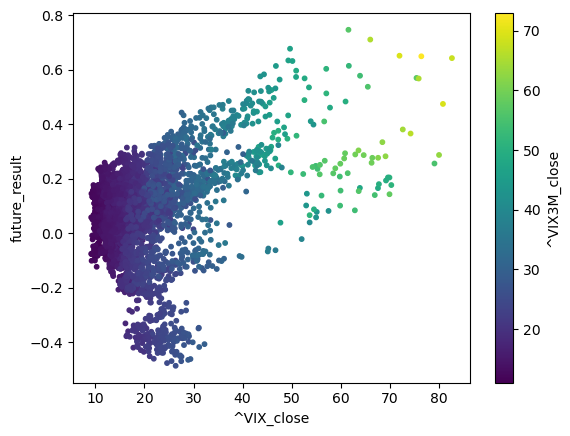

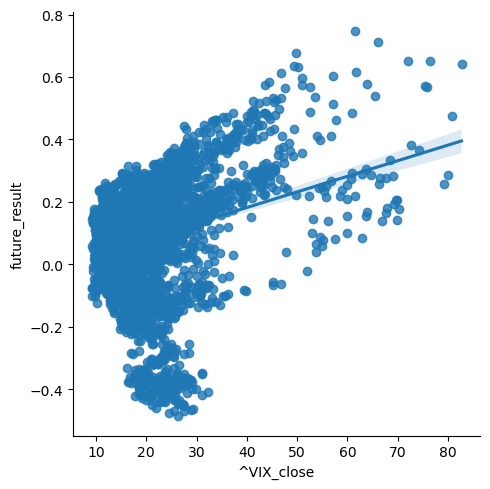

In [25]:
x_axis = '^VIX_close'
y_axis = 'future_result'
c_axis = '^VIX3M_close'
# Draw a scatter plot
df.plot.scatter(x = x_axis, y = y_axis, c = c_axis, colormap='viridis', s = 10)
sns.lmplot(x=x_axis,y=y_axis,data=df,fit_reg=True)

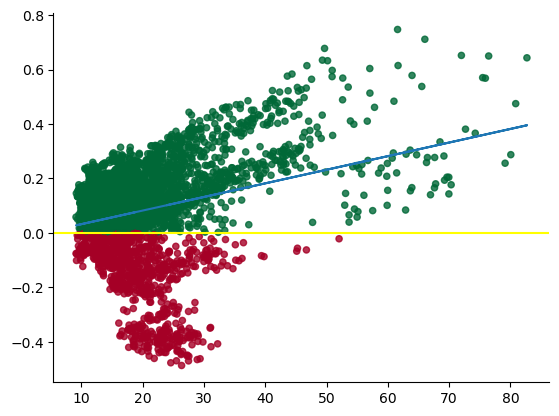

array([18.63999939, 17.73999977, 15.55000019, ..., 24.79000092,
       25.06999969, 24.02000046])

In [26]:
# Draw a scatter plot
x=df['^VIX_close'].to_numpy()
y=df['future_result'].to_numpy()
z=df['future_result_boolean'].to_numpy()

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
# plt.gca().add_patch(Rectangle((70.1, 0), 13, .2, color='green', alpha=0.1))
# plt.axvline(70.1, color='yellow')
plt.axhline(0, color='yellow')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(x, y, c=z, cmap='RdYlGn', alpha=0.8, s=20)
plt.plot(x, mymodel)
plt.show()

# # Draw a scatter plot
# x=df['^VIX3M_close'].to_numpy()
# y=df['future_result'].to_numpy()
# z=df['future_result_boolean'].to_numpy()

# slope, intercept, r, p, std_err = stats.linregress(x, y)
# def myfunc(x):
#   return slope * x + intercept
# mymodel = list(map(myfunc, x))
# plt.gca().add_patch(Rectangle((70.1, 0), 13, .2, color='green', alpha=0.1))
# plt.axvline(70.1, color='yellow')
# plt.axhline(0, color='yellow')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.scatter(x, y, c=z, cmap='RdYlGn', alpha=0.8, s=20)
# plt.plot(x, mymodel)
# plt.show()
x

Text(0.5, 1.0, 'The VIX as an Indicator for Future S&P 500 Returns')

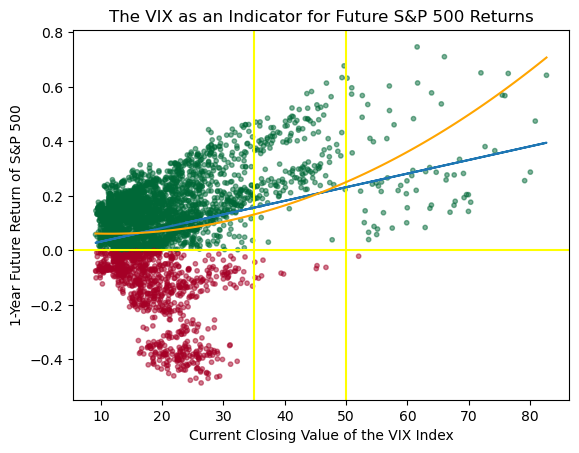

In [27]:
# this is the function we want to fit
def func(x, a, b, c):
    return a*x*x + b*x + c

fig, ax = plt.subplots()
fig.set_dpi(100.0)

ax.scatter(x, y, c=z, cmap='RdYlGn', alpha=0.5, s=10)

plt.axhline(0, color='yellow')
plt.axvline(35, color='yellow')
plt.axvline(50, color='yellow')

# linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

# non-linear least squares to fit func to data
p_opt, p_cov = curve_fit(func, x, y)

# these are the fitted values a, b, c
a, b, c = p_opt

# produce 100 values in the range we want to cover along x
x_fit = np.linspace(min(x), max(x), 100)

# compute fitted y values
y_fit = [func(x, a, b, c) for x in x_fit]

plt.plot(x, mymodel)
ax.plot(x_fit, y_fit, c="orange")
ax.set_xlabel("Current Closing Value of the VIX Index")
ax.set_ylabel("1-Year Future Return of S&P 500")
ax.set_title("The VIX as an Indicator for Future S&P 500 Returns")
# ax.legend()

In [31]:
x=df[['^VIX_close']].to_numpy()
y=df[['future_result']].to_numpy()
z=df[['future_result_boolean']].to_numpy()

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.07675997045233507
intercept: [-0.01767889]
slope: [[0.00499424]]


In [32]:
y_pred = (model.predict(x))
print(f"predicted response:\n{np.round((y_pred)*100,2)}")

predicted response:
[[ 7.54]
 [ 7.09]
 [ 6.  ]
 ...
 [10.61]
 [10.75]
 [10.23]]


In [33]:
print("Enter the current VIX closing price: ")
s = input()
n = int(s)
# x = 70
output_array = model.predict([[n]])
formatted_array = np.round(output_array[0]*100, 1)
print(f"The expected {days_in_future_that_result_is_calculated}-day return of the S&P 500 is: ")
for i in formatted_array:
    print(f"{i}%")

Enter the current VIX closing price: 
70
The expected 250-day return of the S&P 500 is: 
33.2%


In [34]:
import pickle

In [36]:
pickle.dump(model, open("model.pkl", "wb"))

In [40]:
model = pickle.load( open('model.pkl','rb'))
model_output = model.predict([[70]])
print(model_output)

[[0.33191758]]
